In [1]:
from arcgis.gis import GIS
from getpass import getpass
from zipfile import ZipFile

import os
import pandas as pd

In [2]:
print("Please provide a password ...")
password = getpass()
gis = GIS('http://usfs.maps.arcgis.com', 'TPCMAdmin', password)
#gis = gis.GIS('http://usfs.maps.arcgis.com', 'zneumann_usfs', password)
print("Successfully logged on ...")

Please provide a password ...
········
Successfully logged on ...


<User username:TPCMAdmin>
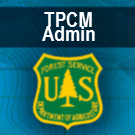

In [3]:
TPCMAdmin = gis.users.me
TPCMAdmin

In [4]:
# Makes list of comment layer Item Ids
# def list_items_in_folder(user, folder_name):
#     ItemId_List = []
#     for folder in user.items(folder=folder_name):
#         ItemId_List.append(folder.id)
#     return ItemId_List

# def export_to_fgdb(ItemId, folder_name):
#     '''Takes the ItemID of a Feature Layer in ArcGIS Online and the name of an already existing folder 
#     and converts the Feature Layer to a FGDB and places it in the chosen folder'''
#     service = gis.content.get(ItemId)
#     service_name = service.title.replace(" ", "_")
#     fgdb_name = service_name + "_FGDB"
#     export = service.export(fgdb_name, 'File Geodatabase', parameters=None, wait='True')
#     fgdb = gis.content.get(export['exportItemId'])
#     fgdb.move(folder_name)
    
# def download_and_unzip(Path, ItemId):
#     Item = gis.content.get(ItemId)
#     Item.download(save_path=Path)
#     zfPath = Path + Item.title.replace('_','').replace('-','') + '.zip'
#     zf = ZipFile(zfPath)
#     zf.extractall(path=Path + Item.title)

[ArcGIS api for python gis.content.search() reference](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc.html?highlight=content%20search#arcgis.gis.ContentManager.search)  

In [ ]:
search_results = gis.content.search('TPCM Comments',  item_type='Feature Layer', max_items=500, sort_field='modified', sort_order='desc')

In [29]:
len(search_results)

316

In [30]:
roles = ['USFS AGOL Administrator Advanced', 'USFS AGOL Administrator', 'USFS Public Publisher']

#PublicPublishersXLSX = r'C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\Documents\PublicPublishers.xlsx'
AllUsersXLSX = r'C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\Documents\AGOLUsers_ALL.xlsx'
df = pd.read_excel(AllUsersXLSX)
publishers = df[df['role'].isin(roles)]
publishers = publishers['username'].tolist()
publishers.remove('TPCMAdmin')

In [31]:
search_query = 'TPCM Comments owner:{}'
item_type = 'Feature Layer'
max_items = 500
for publisher in publishers:
    for layer in gis.content.search(search_query.format(publisher),  item_type=item_type, max_items=max_items):
        USFSPublisher_CFL.append(layer)

In [32]:
len(USFSPublisher_CFL)

131

In [33]:
USFSPublisher_CFL

[<Item title:"Malheur National Forest Cliff Knox TPCM Comments" type:Feature Layer Collection owner:asmason>,
 <Item title:"R06_WAW_ProBetaWildernessCrowdsource_Other_Comments" type:Feature Layer Collection owner:asmason>,
 <Item title:"R06 UMA Landscape Restoration Prioritization Comments" type:Feature Layer Collection owner:asmason>,
 <Item title:"WAW_TrailsCrowdsource_Comments" type:Feature Layer Collection owner:asmason>,
 <Item title:"WAW_WildernessTrailsAssessment_Comments" type:Feature Layer Collection owner:asmason>,
 <Item title:"Malheur National Forest Cliff Knox TPCM Comments (secure)" type:Feature Layer Collection owner:asmason>,
 <Item title:"R06 UMA Landscape Restoration Prioritization Comments " type:Feature Layer Collection owner:asmason>,
 <Item title:"R06_WAW_ProBetaWildernessCrowdsource_Other_Comments_Public" type:Feature Layer Collection owner:asmason>,
 <Item title:"R03_CIB_Region 3 Recreation Site Review_Draft_Comments" type:Feature Layer Collection owner:cbogart_

In [34]:
CFLdict = {}
# spreadsheet with item title, owner, tags, id
x = 0
for cfl in USFSPublisher_CFL:
    CFLdict['row_{}'.format(x)] = [cfl.title, cfl.owner, cfl.id]
    x+=1

In [35]:
CFLdict

{'row_0': ['Malheur National Forest Cliff Knox TPCM Comments',
  'asmason',
  'a02c6673bb104748916218dcc98d12a3'],
 'row_1': ['R06_WAW_ProBetaWildernessCrowdsource_Other_Comments',
  'asmason',
  '8424c67ef7cc4bd09582cd9987bc2266'],
 'row_2': ['R06 UMA Landscape Restoration Prioritization Comments',
  'asmason',
  'c345694e93744bb7b040d5f5223e5cdc'],
 'row_3': ['WAW_TrailsCrowdsource_Comments',
  'asmason',
  '34b868855dc943d48f82b5df33a7c02b'],
 'row_4': ['WAW_WildernessTrailsAssessment_Comments',
  'asmason',
  'aff305c4feb64086835bc5106a15985f'],
 'row_5': ['Malheur National Forest Cliff Knox TPCM Comments (secure)',
  'asmason',
  '84d333c7e96d418db14dcd0a3a3f17fd'],
 'row_6': ['R06 UMA Landscape Restoration Prioritization Comments ',
  'asmason',
  'ceeceafd3ee2486eb8df4ccefa6a8d4a'],
 'row_7': ['R06_WAW_ProBetaWildernessCrowdsource_Other_Comments_Public',
  'asmason',
  '73058a82e9024b95b5ec53f3f0e78d8f'],
 'row_8': ['R03_CIB_Region 3 Recreation Site Review_Draft_Comments',
  'cb

In [36]:
df = pd.DataFrame.from_dict(CFLdict, orient='index')
df

,0,1,2
row_0,Malheur National Forest Cliff Knox TPCM Comments,asmason,a02c6673bb104748916218dcc98d12a3
row_1,R06_WAW_ProBetaWildernessCrowdsource_Other_Com...,asmason,8424c67ef7cc4bd09582cd9987bc2266
row_2,R06 UMA Landscape Restoration Prioritization C...,asmason,c345694e93744bb7b040d5f5223e5cdc
row_3,WAW_TrailsCrowdsource_Comments,asmason,34b868855dc943d48f82b5df33a7c02b
row_4,WAW_WildernessTrailsAssessment_Comments,asmason,aff305c4feb64086835bc5106a15985f
...,...,...,...
row_126,R2_Arapaho_Roosevelt_Magnolia_Trail_Line_Comme...,USFSRegion02,3d40a04199684bc78afd4f2cf48830fd
row_127,SJNF_HermosaSMA_CommentsSecure,USFSRegion02,6ee50e3687b34f51b602b4bb203156ca
row_128,TongassNFBigGameCruiseGuideComments,USFSRegion10,a91f2a80f33248f79e43faeaef54e620
row_129,TongassNFBigGameCruiseGuideComments (secure),USFSRegion10,a9e8469a27954526910b2413ff2c5bc6


In [37]:
df.to_excel('TPCM_CFL_2020_0915.xlsx')

In [65]:
result = USFSPublisher_CFL[2]

In [66]:
result.tags

['Talking Points Collaborative Mapping',
 'Talking Points Reporter',
 'Talking Points Manager',
 'TPCM',
 'Malheur National Forest',
 'Region 6',
 'US Forest Service',
 'Comments',
 'Cliff Knox']

In [36]:
result.title

'TPCM_Comment_Layer_AB'

In [37]:
result.id

'192ea4971c6a4389ab5053c41970fb88'

In [38]:
result.owner

'abruner_usfs'

In [39]:
result.modified

1524597899000

In [40]:
comment_layers_owned_by_TPCM = list_items_in_folder(TPCMAdmin, 'TPCM Project Comment Layers')

In [41]:
TPCMAdmin_CFL = []

In [42]:
for id in comment_layers_owned_by_TPCM:
    for layer in gis.content.search(id):
        TPCMAdmin_CFL.append(layer)

In [43]:
TPCMAdmin_CFL

[<Item title:"Santa Fe National Forest Comment Layer" type:Feature Layer Collection owner:TPCMAdmin>,
 <Item title:"R04_ANF_TPCM_Comment_Layer_02" type:Feature Layer Collection owner:TPCMAdmin>,
 <Item title:"R3 Coronado NF TPCM Comment Layer" type:Feature Layer Collection owner:TPCMAdmin>,
 <Item title:"Tonto National Forest Potential Wild Scenic River Comments" type:Feature Layer Collection owner:TPCMAdmin>,
 <Item title:"HLCNF Youth Voices Comments" type:Feature Layer Collection owner:TPCMAdmin>,
 <Item title:"R04_SCNF_TPCM_Wilderness_Inventory_Comments" type:Feature Layer Collection owner:TPCMAdmin>,
 <Item title:"SJNF_HermosaSMA_Comments" type:Feature Layer Collection owner:TPCMAdmin>,
 <Item title:"CNNFRecFeeProposalComments" type:Feature Layer Collection owner:TPCMAdmin>,
 <Item title:"CusterGallatin_WSR_Feedback_2017" type:Feature Layer Collection owner:TPCMAdmin>,
 <Item title:"Nez Perce  Clearwater Wild and Scenic Eligible Rivers Comments" type:Feature Layer Collection owner:

In [105]:
for ItemId in comment_layers_owned_by_TPCM:
    export_to_fgdb(ItemId, 'TPCM Project Comment Layers FGDB')

In [163]:
for ItemId in list_items_in_folder(TPCMAdmin, 'TPCM Project Comment Layers FGDB'):
    download_and_unzip(r'./TPCMdata/', ItemId)

In [167]:
directories = []
for root, dirs, files in os.walk(r'./TPCMdata'):
    for dir in dirs:
        directories.append(dir)
fgdb = directories[0:31]

In [165]:
directories

['Alaska_Roadless_Comments_FGDB',
 'BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB',
 'CNNFRecFeeProposalComments_FGDB',
 'CusterGallatin_WSR_Feedback_2017_FGDB',
 'Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB',
 'GilaNF_WildernessCharacteristicsEvaluation_Comments_FGDB',
 'Gila_National_Forest_Wild_and_Scenic_Rivers_Evaluation_Comments_FGDB',
 'GMFL_Integrated_Resource_Comments_Private_FGDB',
 'HLCNF_Youth_Voices_Comments_FGDB',
 'Lincoln_NF_Wilderness_Inventory_Public_Comment_Phase_SECURE_FGDB',
 'Mad_Rabbit_Trails_Project_A_Solution_Comments_FGDB',
 'Mad_Rabbit_Trails_Project_B_Solution_Comments_FGDB',
 'Nez_Perce__Clearwater_Wild_and_Scenic_Eligible_Rivers_Comments_FGDB',
 'R04_ANF_TPCM_Comment_Layer_02_FGDB',
 'R04_SCNF_TPCM_Wilderness_Evaluation_Comments__FGDB',
 'R04_SCNF_TPCM_Wilderness_Inventory_Comments_FGDB',
 'R09_SNF_Tofte_Landscape_Project_-_TPCM_Pro_Solution_Comments_FGDB',
 'R2_Arapahoe_Rooselvelt_Magnolia_Trail_Line_Comments_FGDB',
 'R2

In [ ]:
len(fgdb)

In [181]:
path = r'./TPCMdata/'

for gdb in fgdb:
    for root, dirs, files in os.walk(os.path.join(path,gdb)):
        print('renaming {}'.format(root))
#         for dir in dirs:
        os.rename(root + '/' + dir, root + '/' + gdb + '.gdb')     

renaming ./TPCMdata/Alaska_Roadless_Comments_FGDB
renaming ./TPCMdata/Alaska_Roadless_Comments_FGDB\Alaska_Roadless_Comments_FGDB.gdb
renaming ./TPCMdata/BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB
renaming ./TPCMdata/BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB\BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB.gdb
renaming ./TPCMdata/CNNFRecFeeProposalComments_FGDB
renaming ./TPCMdata/CNNFRecFeeProposalComments_FGDB\CNNFRecFeeProposalComments_FGDB.gdb
renaming ./TPCMdata/CusterGallatin_WSR_Feedback_2017_FGDB
renaming ./TPCMdata/CusterGallatin_WSR_Feedback_2017_FGDB\CusterGallatin_WSR_Feedback_2017_FGDB.gdb
renaming ./TPCMdata/Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB
renaming ./TPCMdata/Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB\Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB.gdb
renaming ./TPCMdata/GilaNF_WildernessCharacteristicsEvaluation_Comments_FGDB
renaming ./TPCMdata/GilaNF_W

In [201]:
from shutil import copytree

In [209]:
for gdb in fgdb:
    print("gdb: {}".format(gdb))
    for root, dirs, files in os.walk(os.path.join(path,gdb)):
        print("root: {}".format(root))
        print("dir: {}".format(dir))

gdb: Alaska_Roadless_Comments_FGDB
root: C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\Alaska_Roadless_Comments_FGDB
dir: Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB.gdb
root: C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\Alaska_Roadless_Comments_FGDB\Alaska_Roadless_Comments_FGDB.gdb
dir: Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB.gdb
gdb: BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB
root: C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB
dir: Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB.gdb
root: C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB\BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB.gdb
dir: Custer_Gallatin_Forest_Pla

root: C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\Santa_Fe_National_Forest_Comment_Layer_FGDB
dir: Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB.gdb
root: C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\Santa_Fe_National_Forest_Comment_Layer_FGDB\Santa_Fe_National_Forest_Comment_Layer_FGDB.gdb
dir: Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB.gdb
gdb: SJNF_HermosaSMA_Comments_FGDB
root: C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\SJNF_HermosaSMA_Comments_FGDB
dir: Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB.gdb
root: C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\SJNF_HermosaSMA_Comments_FGDB\SJNF_HermosaSMA_Comments_FGDB.gdb
dir: Custer_Gallatin_Forest_Plan_Revision_Wilderness_Inventory_Comments_FGDB.gdb
gdb: TontoNF_Draft_Wilderness_Inven

In [307]:
path_src = 'C:\\Users\\zneumann\\_projects\\TPCM\\TPCM-Data-Aggregation-Scripts\\JupyterNotebook\TPCMdata'
path_dst = 'T:\\FS\\BusOps\\EnterpriseProgram\\Project\\WO\\WOEMCTPCMSupport2016_214\\GIS\\Data\\Esri_Comment_Layer_20200414'

gdb_dic = {}
gdb_name = []

for gdb in fgdb:
    for root, dirs, files in os.walk(os.path.join(path_src,gdb)):
        if root[-4:] == '.gdb':
            gdb_dic["{}.gdb".format(gdb)] = root
            
for gdb in fgdb:
    name = "{}.gdb".format(gdb)
    src = gdb_dic[name]
    dst = os.path.join(path_dst,name)
    print(src)
    print(dst)
    print('\n')
    try:
        copytree(src, dst, symlinks=True)
    except:
        pass

C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\Alaska_Roadless_Comments_FGDB\Alaska_Roadless_Comments_FGDB.gdb
T:\FS\BusOps\EnterpriseProgram\Project\WO\WOEMCTPCMSupport2016_214\GIS\Data\Esri_Comment_Layer_20200414\Alaska_Roadless_Comments_FGDB.gdb


C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB\BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB.gdb
T:\FS\BusOps\EnterpriseProgram\Project\WO\WOEMCTPCMSupport2016_214\GIS\Data\Esri_Comment_Layer_20200414\BOR_Twin_Buttes_Travel_Management_Plan_Comments_FGDB.gdb


C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\CNNFRecFeeProposalComments_FGDB\CNNFRecFeeProposalComments_FGDB.gdb
T:\FS\BusOps\EnterpriseProgram\Project\WO\WOEMCTPCMSupport2016_214\GIS\Data\Esri_Comment_Layer_20200414\CNNFRecFeeProposalComments_FGDB.gdb


C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggreg

C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\Santa_Fe_National_Forest_Comment_Layer_FGDB\Santa_Fe_National_Forest_Comment_Layer_FGDB.gdb
T:\FS\BusOps\EnterpriseProgram\Project\WO\WOEMCTPCMSupport2016_214\GIS\Data\Esri_Comment_Layer_20200414\Santa_Fe_National_Forest_Comment_Layer_FGDB.gdb


C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\SJNF_HermosaSMA_Comments_FGDB\SJNF_HermosaSMA_Comments_FGDB.gdb
T:\FS\BusOps\EnterpriseProgram\Project\WO\WOEMCTPCMSupport2016_214\GIS\Data\Esri_Comment_Layer_20200414\SJNF_HermosaSMA_Comments_FGDB.gdb


C:\Users\zneumann\_projects\TPCM\TPCM-Data-Aggregation-Scripts\JupyterNotebook\TPCMdata\TontoNF_Draft_Wilderness_Inventory_Comments_FGDB\TontoNF_Draft_Wilderness_Inventory_Comments_FGDB.gdb
T:\FS\BusOps\EnterpriseProgram\Project\WO\WOEMCTPCMSupport2016_214\GIS\Data\Esri_Comment_Layer_20200414\TontoNF_Draft_Wilderness_Inventory_Comments_FGDB.gdb


C:\Users\zneumann\_projec